In [575]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_theme()

cpufs = []
for file in range(0, 20):
    with open(f'dados/1000-{file}-clients-cpu.log') as f:
        cpufs.append(f.read())

In [576]:
listtmps = []
for i in range(len(cpufs)):
    separator = '+++++++++++++++++++++++++++'
    tmp = cpufs[i].split(separator)
    ltmp = []
    for el in tmp:
        ltmp.append(el.split('\n'))
    for l in ltmp:
        for e in l:
            if e == '':
                l.remove('')
    for l in ltmp:
        if len(l) == 0:
            ltmp.remove(l)
    listtmps.append(ltmp)

In [577]:
dfs = []
for l in listtmps:
    dfs.append(l[-1])

In [578]:
for l in dfs:
    for i, line in enumerate(l):
        l[i] = line.split()

In [579]:
dframes = []
for i, l in enumerate(dfs):
    tmp = pd.DataFrame(dfs[i])
    dframes.append(tmp)

In [580]:
for i in range(len(dframes)):
    try:
        dframes[i].iloc[:,2] = dframes[i].iloc[:,2].astype(np.float64)
    except:
        print(i)

0
1
2
3
4
9
12
14
16
19


In [587]:
clean = []

In [588]:
for i in range(len(dframes)):
    try:
        clean.append([i, dframes[i].iloc[:,2].sum(), dframes[i].iloc[:,2].mean()])
    except:
        print(i)

0
1
2
3
4
9
12
14
16
19


In [589]:
clean.

[[5, 710.0, 1.4730290456431536],
 [6, 1483.6999999999998, 1.47926221335992],
 [7, 1477.7999999999997, 1.4733798604187436],
 [8, 1232.5, 1.345524017467249],
 [10, 1083.6, 1.4987551867219915],
 [11, 216.4, 1.4924137931034482],
 [13, 1239.0, 1.5128205128205128],
 [15, 433.5, 1.5],
 [17, 69.5, 1.4479166666666667],
 [18, 1291.4, 1.4098253275109172]]

In [590]:
df = pd.DataFrame(clean)

In [596]:
df.iloc[8,:] = df.iloc[9,:]

In [599]:
df = df[:9]

In [612]:
df

,ind,sumCPU%,meanCPU%
0,5,710.0,1.473029
1,6,1483.7,1.479262
2,7,1477.8,1.473380
3,8,1232.5,1.345524
4,10,1083.6,1.498755
6,13,1239.0,1.512821
8,18,1291.4,1.409825


In [613]:
df.drop(index=[1]).describe()

,ind,sumCPU%,meanCPU%
count,6.000000,6.000000,6.000000
mean,10.166667,1172.383333,1.452222
std,4.708149,259.683241,0.063087
min,5.000000,710.000000,1.345524
25%,7.250000,1120.825000,1.425626
50%,9.000000,1235.750000,1.473204
75%,12.250000,1278.300000,1.492411
max,18.000000,1477.800000,1.512821


In [606]:
df.columns = ['ind', 'sumCPU%', 'meanCPU%']

/home/decarv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


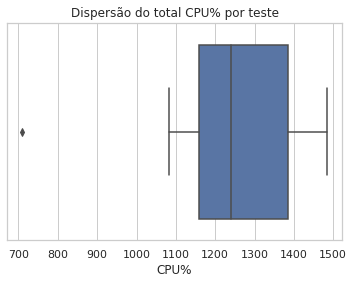

In [609]:
sb.boxplot(df['sumCPU%'])
plt.title("Dispersão do total CPU% por teste")
plt.xlabel("CPU%");

/home/decarv/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


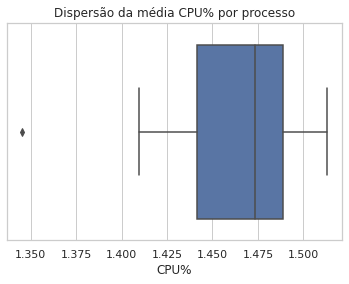

In [610]:
sb.boxplot(df['meanCPU%'])
plt.title("Dispersão da média CPU% por processo")
plt.xlabel("CPU%");

In [608]:
sb.set_style('whitegrid')

In [611]:
df.describe()

,ind,sumCPU%,meanCPU%
count,7.000000,7.000000,7.000000
mean,9.571429,1216.857143,1.456085
std,4.577377,264.653723,0.058490
min,5.000000,710.000000,1.345524
25%,6.500000,1158.050000,1.441427
50%,8.000000,1239.000000,1.473380
75%,11.500000,1384.600000,1.489009
max,18.000000,1483.700000,1.512821
